In [1]:
import collections
import inspect
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog
from graphiclog import utils, io, defaults

In [2]:
graphiclog.__file__, dir(graphiclog)

('/Users/zanejobe/opt/anaconda3/lib/python3.7/site-packages/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

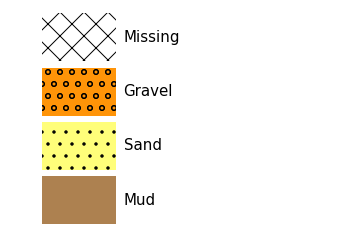

In [3]:
graphiclog.defaults.litholegend.plot()

# Load All Sequences

Here's a function (modified from `depstrat.data`) to load all the sequences as `BedSequence`s: 

In [4]:
# Set up some default args:

FPATH = '../data/AllBedsWithProfiles_CLEAN.csv'

# Columns to convert from strings to arrays
transforms = {c : utils.string2array_pandas for c in ['depth_m', 'grain_size_mm', 'grain_size_psi']}


# binary indicators
BINARY_FEATURES = ['snd', 'shl']


# bed data columns
FLOAT_FEATURES = [
    'th',
    'gs_tops_psi',
    'mean_gs_psi',
    'max_gs_psi',
    'grain_size_psi',
    'depth_m'
]

FEATURES = BINARY_FEATURES + FLOAT_FEATURES


# Sequence-level metadata
METACOLS = ['name', 'count', 'collection', 'eod', 'eodnum']


# Lithology component map
COMPONENT_MAP = ('mean_gs_psi', lambda gs: defaults.gs2litho(gs, units='psi'))

In [5]:
def load_sequences(
    fpath=FPATH,
    resample=None,
    depth_col='depth_m',
    features=FEATURES,
    metacols=METACOLS,
    min_length=3
):
    """
    Load the dataset from saved csv. Return list of BedSequences.
    """
    df = pd.read_csv(fpath, converters=transforms)

    bed_seqs = []
    for name, grp in df.groupby('count'):
        seq = graphiclog.BedSequence.from_dataframe(
                grp,
                topcol='tops',
                basecol='bases',
                component_map=COMPONENT_MAP,
                datacols=features,
                metacols=metacols
        )
        if len(seq) >= min_length:
            bed_seqs.append(seq)

    # resample arrays if you want
    for seq in bed_seqs:
        if resample is not None:
            seq.resample_data(depth_col, resample)

    return bed_seqs

In [6]:
sequences = load_sequences()

# Check out a sequence

In [8]:
seq = random.choice(sequences)

seq

Striplog(63 Intervals, start=0.0, stop=105.108444843353)

In [9]:
seq.metadata

{'name': 'Sierra del Toro flame',
 'count': 284,
 'collection': 'Cerro Toro',
 'eod': 'slopechannel',
 'eodnum': 2}

In [10]:
# The first bed
seq[0]

Interval({'data': {'snd': 0.0, 'shl': 1.0, 'th': 1.82195410792356, 'gs_tops_psi': -6.752999999999999, 'mean_gs_psi': -6.752999999999999, 'max_gs_psi': -6.752999999999999, 'grain_size_psi': array([-6.7486, -6.7486]), 'depth_m': array([105.1084, 103.2865])}, 'top': Position({'middle': 105.108444843353, 'units': 'm'}), 'base': Position({'middle': 103.28649073542944, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'mud'})]})

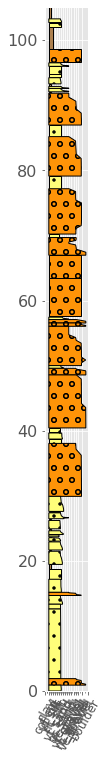

In [12]:
seq.plot(legend=defaults.litholegend, width_field='grain_size_psi', fig_width=1)

In [18]:
i=1
print('gs array gs', seq[i].data['grain_size_psi'])
print('gs array depth', seq[i].data['depth_m'])

gs array gs [-2.3899 -2.2863 -2.101  -1.9159 -1.812  -1.812 ]
gs array depth [103.2865 103.2599 103.1203 102.9274 102.8077 102.7213]
